# Propriétés d'une population fictive de 130 personnes: analyse univariée qualitative

Version du 15 mars 2025.



Synthetic data with artifical bias in order to illustrate some aspects of data analysis methodologies.

No relationship at all with reality.

Data source: [this notebook](production_aleatoire_observations_llm.ipynb)


## Importer les librairies nécessaires

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (-> [Site Wikistat](http://wikistat.fr/))


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [60]:
### Lire le fichier qui contient les données à analyser

# noter qu'un index supplémentaire, commençant à 0, est ajouté

# Alternatives: 'data/observations_mod.csv', 'data/observations_900.csv'
path = 'data/llama3_20250315.csv'

observations = pd.read_csv(path)
observations.head()

,id,age,gender,monthly_revenue,newspaper_reading_frequency,political_orientation,time_social_media
0,1,39,Other,24147,daily,Rightwing,115
1,2,81,Male,47296,daily,Rightwing,0
2,3,60,Male,4991,week-end,Populist,140
3,4,51,Female,14162,daily,Center,108
4,5,30,Male,12519,3-4 days a week,Rightwing,171


In [61]:
# La même variable transformée en liste
print(list(observations.index)[0:5])

[0, 1, 2, 3, 4]


In [62]:
### changer l'index et mettre la valeur 'id' comme index
# et ce afin de garder une cohérence avec les données de départ
# Ça pourrait être notamment une primary key d'une table
observations.set_index('id', inplace=True)
# inspecter les huit dernières lignes du dataframe
observations.tail(8)

,age,gender,monthly_revenue,newspaper_reading_frequency,political_orientation,time_social_media
id,,,,,,
1693,40,Female,2467,rarely,Ecologist,92
1694,29,Male,3773,week-end,Populist,138
1695,39,Female,7325,3-4 days a week,Leftwing,104
1696,25,Other,2839,sometimes,Populist,47
1697,21,Female,3198,week-end,Populist,161
1698,29,Female,1622,sometimes,Ecologist,130
1699,83,Male,22076,3-4 days a week,Rightwing,29
1700,48,Female,29750,3-4 days a week,Rightwing,108


In [63]:
## Nombre de lignes et de colonnes du tableau
print(observations.shape)

(1700, 6)


In [64]:
## Nombre de lignes et de colonnes du tableau
print(list(observations.columns))

['age', 'gender', 'monthly_revenue', 'newspaper_reading_frequency', 'political_orientation', 'time_social_media']


In [65]:
### On donne un nom plus court à la table
# et on renomme les colonnes, notamment si appelées différemment des précédentes
 
obs = observations
obs.columns = ['age', 'gender', 'reven', 'read', 'pol', 'media']
print(obs.head())

    age  gender  reven             read        pol  media
id                                                       
1    39   Other  24147            daily  Rightwing    115
2    81    Male  47296            daily  Rightwing      0
3    60    Male   4991         week-end   Populist    140
4    51  Female  14162            daily     Center    108
5    30    Male  12519  3-4 days a week  Rightwing    171


In [66]:
# Attention: 'obs n'est qu'une table alias, non une nouvelle table (cf. deep copy)
# En cas de modifications de noms colonnes ou valeurs, celles de la table changent aussi.
print(observations.head())

    age  gender  reven             read        pol  media
id                                                       
1    39   Other  24147            daily  Rightwing    115
2    81    Male  47296            daily  Rightwing      0
3    60    Male   4991         week-end   Populist    140
4    51  Female  14162            daily     Center    108
5    30    Male  12519  3-4 days a week  Rightwing    171


In [67]:
## Propriétés du tableau (variables, valeurs manquantes
# et types de valeurs)
print(obs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 1 to 1700
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     1700 non-null   int64 
 1   gender  1700 non-null   object
 2   reven   1700 non-null   int64 
 3   read    1700 non-null   object
 4   pol     1700 non-null   object
 5   media   1700 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 93.0+ KB
None


## Regrouper et analyser les variables qualitatives

### Genre

In [68]:
### Regrouper et compter
gb_gender = obs.groupby('gender').size()

# l'index de la série sous forme de liste
print(list(gb_gender.index))

print(gb_gender)

['Female', 'Male', 'Other']
gender
Female    841
Male      769
Other      90
dtype: int64


### Parti politique

In [69]:
### Regrouper et compter
gb_parti = obs.groupby('pol').size()
sgb_parti = gb_parti.sort_values(ascending = True)
print(sgb_parti)

pol
Rightwing    261
Ecologist    271
Center       327
Populist     417
Leftwing     424
dtype: int64


In [70]:
### Création et modification du dataframe
df_partis = pd.DataFrame(sgb_parti, columns=['effectif'])
df_partis.reset_index(inplace=True)
df_partis

,pol,effectif
0,Rightwing,261
1,Ecologist,271
2,Center,327
3,Populist,417
4,Leftwing,424


In [88]:
### Le code attribué manuellement permet de représenter l'émicycle parlementaire lors du tri
# En revanche, noter que la valeur n'a pas de signification quantitative
df_partis['code_parti'] = [3,0,2,4,1]
df_partis.sort_values(by='code_parti')

,pol,effectif,code_parti
1,Ecologist,271,0
4,Leftwing,424,1
2,Center,327,2
0,Rightwing,261,3
3,Populist,417,4


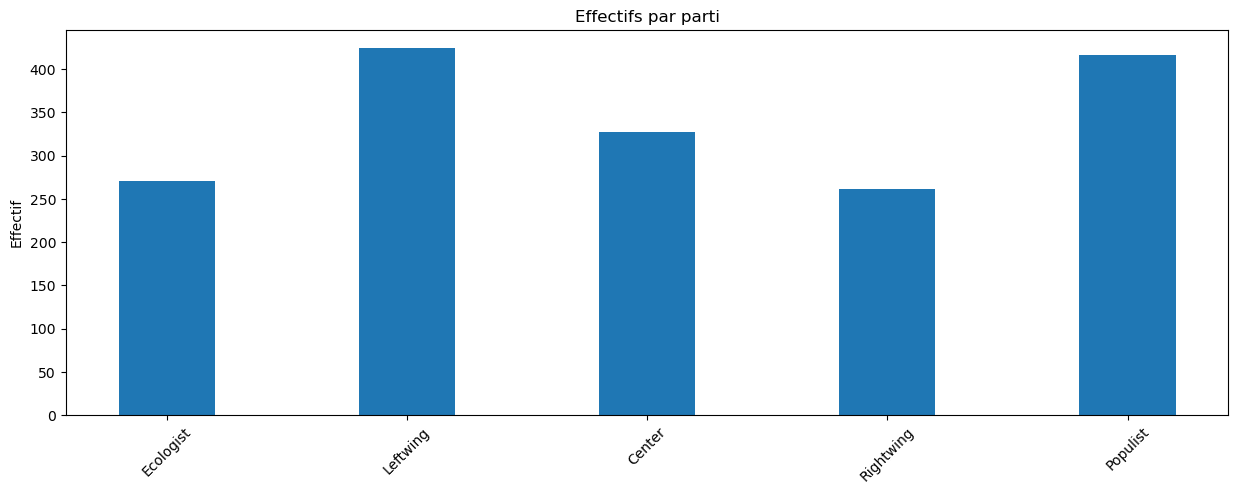

In [89]:
# Distribution par parti: représentation par diagramme à barres

objects = [l for l in df_partis['pol']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['pol']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(15,5)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Fréquence de lecture d'un journal

In [90]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('read').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = False)
print(sgb_lecture_journal)

read
3-4 days a week    486
week-end           369
rarely             335
sometimes          266
daily              244
dtype: int64


In [91]:
## Le code permet un tri dans l'ordre de la fréquence de cette variable 
#  qui en fait est une variable qualitative ordonnée
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [4,3,1,2,5]
df_lecture_journal

,lecture,effectif,code_lecture
0,3-4 days a week,486,4
1,week-end,369,3
2,rarely,335,1
3,sometimes,266,2
4,daily,244,5


In [92]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
print(list(df_lecture_journal['lecture']))

['rarely', 'sometimes', 'week-end', '3-4 days a week', 'daily']


In [94]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
print(df_lecture_journal)

           lecture  effectif  code_lecture  effectif_cumule
2           rarely       335             1              335
3        sometimes       266             2              601
1         week-end       369             3              970
0  3-4 days a week       486             4             1456
4            daily       244             5             1700


In [95]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
2,rarely,335,1,335,19.71
3,sometimes,266,2,601,15.65
1,week-end,369,3,970,21.71
0,3-4 days a week,486,4,1456,28.59
4,daily,244,5,1700,14.35


In [96]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,rarely,335,1,335,19.71,19.71
3,sometimes,266,2,601,15.65,35.35
1,week-end,369,3,970,21.71,57.06
0,3-4 days a week,486,4,1456,28.59,85.65
4,daily,244,5,1700,14.35,100.00


In [97]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,rarely,335,1,335,19.71,19.71
3,sometimes,266,2,601,15.65,35.35
1,week-end,369,3,970,21.71,57.06
0,3-4 days a week,486,4,1456,28.59,85.65
4,daily,244,5,1700,14.35,100.00


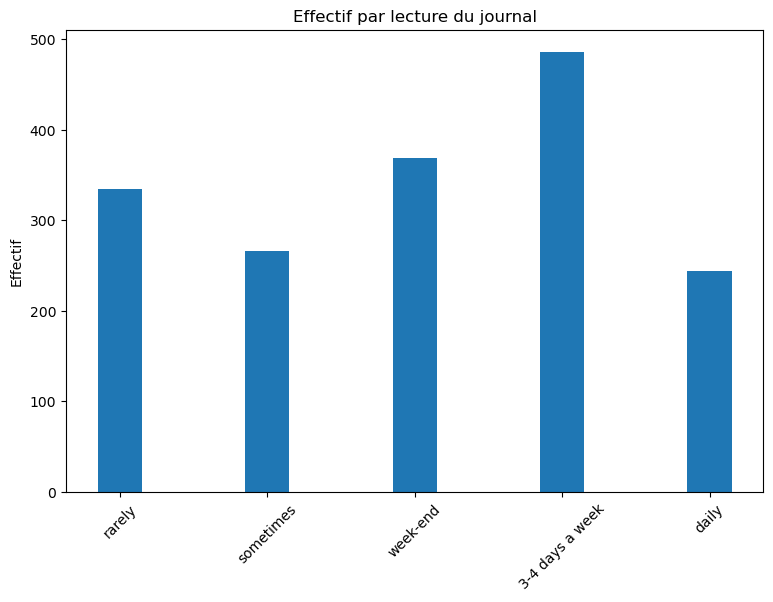

In [98]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(9,6)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [117]:
lect_jour = df_lecture_journal[['lecture', 'frequence']]
lect_jour.set_index('lecture', inplace=True)
lect_jour.head()


,frequence
lecture,
rarely,19.71
sometimes,15.65
week-end,21.71
3-4 days a week,28.59
daily,14.35


<Axes: xlabel='lecture'>

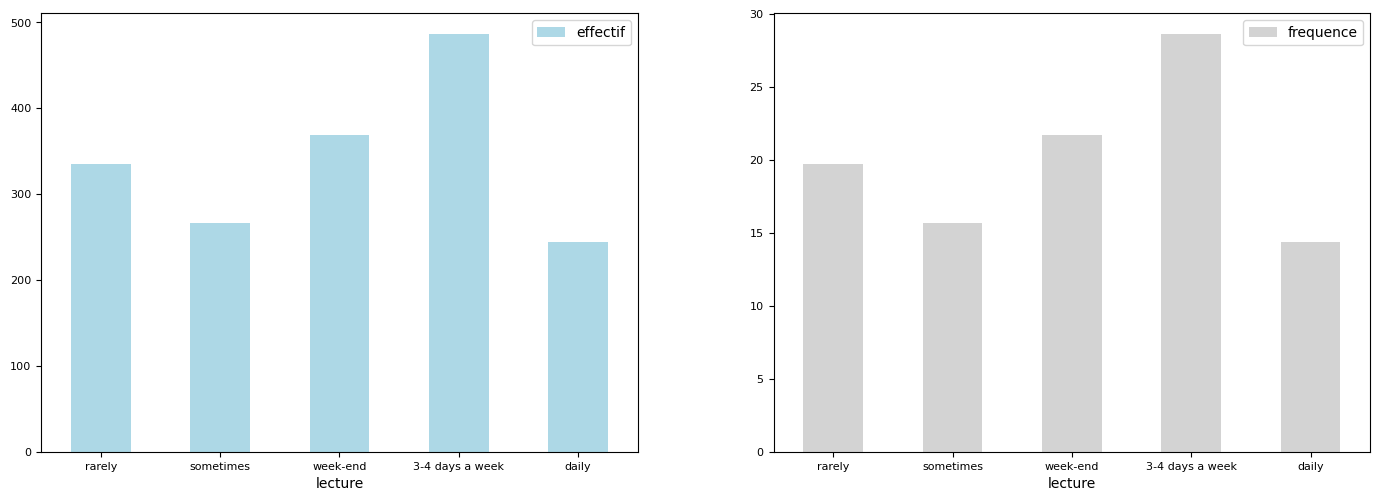

In [118]:
### Colormaps
# http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

fig, axs = plt.subplots(1,2)
fig.tight_layout()

df_lecture_journal.plot(kind='bar', x='lecture', y='effectif',ax=axs[0], 
                        figsize=(15,5), color='lightblue',rot=0, fontsize=8)
df_lecture_journal.plot(kind='bar', x='lecture', y='frequence',ax=axs[1], 
                        figsize=(15,5), color='lightgrey', rot=0, fontsize=8)


<Axes: ylabel='frequence'>

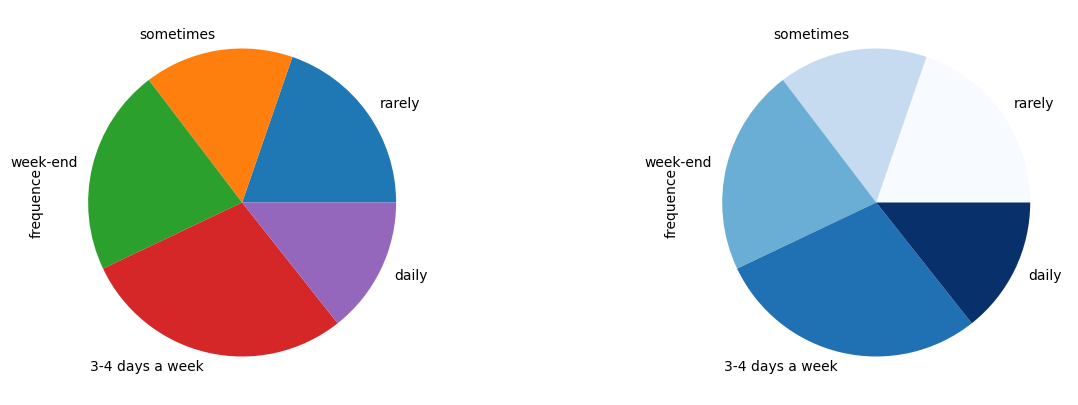

In [119]:
### Colormaps
# http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

fig, axs = plt.subplots(1,2)

lect_jour.plot(kind='pie', y='frequence',ax=axs[0], figsize=(15,5), legend=False)

### A préferer: une seule couleur, car différente intensité du même phénomène
# Noter que l'ordre d'intensité (du plus clair au plus sombre) 
# dépend du traitement préalable du tableau affiché, le lignes étant
# en ordre d'intensité croissante
lect_jour.plot(kind='pie', y='frequence',ax=axs[1], colormap='Blues', figsize=(15,5), legend=False)


In [120]:
### Préparer les données pour un barplot

ljt = lect_jour.T
ljt

lecture,rarely,sometimes,week-end,3-4 days a week,daily
frequence,19.71,15.65,21.71,28.59,14.35


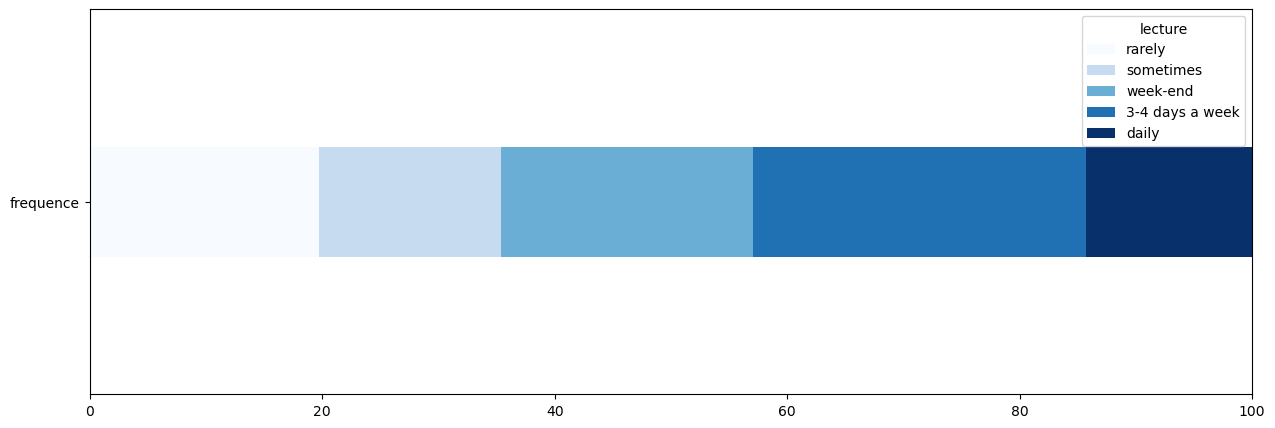

In [121]:
### Pandas plot reference
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
## Barplots
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

fig = ljt.plot(kind='barh', stacked=True, figsize=(15,5), colormap='Blues', width=0.2, xlim=[0,100])

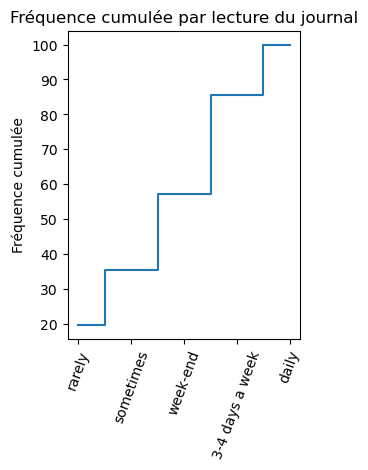

In [126]:
### Distribution par lecture journal: fréquence cumulée
# Diagramme par paliers plus lisible

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid') # autre valeur: steps-post, steps

plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(3,4)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=70)
plt.show()

## On peut ainsi commenter l'évolution de la distribution